In [1]:
from scipy.stats import hypergeom
from scipy.stats import binom
from decimal import *
import numpy as np
import os
from cycler import cycler
%matplotlib inline  
#import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter
np.set_printoptions(threshold=np.nan)

In [2]:
M = 10000


f=0.12
n = M*f
N = 1000
x = N/2
p = binom.sf(x,N,f)

p1 = 1-hypergeom.cdf(x, M, n, N)
p2 = hypergeom.sf(x, M, n, N)



In [3]:
def get_probs(N,fm,t,tn):
    x = N/2
    lfm = len(fm)
    pm = binom.sf(x,N,fm)
    prb=np.zeros((lfm,tn))
    xxt = np.linspace(0,t*365*24*60,tn)
    for i,pi in enumerate(pm): 
        prb[i,:] = 1-np.power(1-pi,xxt)
    return prb

In [4]:
def get_probs_tminutes(N,fm,t):
    x = N/2
    lfm = len(fm)
    pm = binom.sf(x,N,fm)
    prb=np.zeros((lfm,len(t)), dtype = np.float64)
    for i,pi in enumerate(pm): 
        prb[i,:] = 1-np.power(1-pi,t)
    return prb

In [5]:
def get_probs_single(N,fm):
    
    M=10000
    n=np.multiply(M,fm)
    p = binom.sf(N/2,N,fm)
    #p1=[]
    #p2=[]
    #for ni in n:
        #p1.append(1-hypergeom.cdf(N/2, M, ni, N))
        #p2.append(hypergeom.sf(N/2, M, ni, N))
    
    return p
    

In [6]:
def get_probs_single_N(Nm,f):
    
    M=10000
    n=np.multiply(M,f)
    p=[]
    for ni in Nm:
        p.append(binom.sf(ni/2,ni,f))
    #p1=[]
    #p2=[]
    #for ni in n:
        #p1.append(1-hypergeom.cdf(N/2, M, ni, N))
        #p2.append(hypergeom.sf(N/2, M, ni, N))
    return p

In [7]:
def plot_probs_array_single(Nm,fm):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    
    j=0
    cols = cm.rainbow(np.linspace(0, 0.87, len(fm)))
    
    for ax,Ni in zip(axes.flat, Nm):
        pz=get_probs_single(Ni,fm)
        print(pz)
        x=range(len(pz))
        bars = ax.bar(x, height=pz)

        for i,fmi in enumerate(fm):
            bars[i].set_color(cols[i]) 
        #plt.xticks(fm, str(fm))
        #plt.yticks(np.log(pz), str(pz))
        ax.set_yscale('log')
        ax.set_title('n='+ str(Ni))
        ax.grid(True)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height* 0.8])
        ax.tick_params(axis='both', which='major', labelsize=8)
        #start, end = ax.get_xlim()
        #ax.xaxis.set_ticks(np.arange(start, end, 0.25))
        if j%2==0:
            ax.set_ylabel('Probability')
        if j>=2:
            ax.set_xlabel('Fraction of bad nodes')
        j=j+1
        ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
        

    handles, labels = ax.get_legend_handles_labels()
    lgd = fig.legend(handles, labels,loc='right', fontsize='small',bbox_to_anchor=(0.97, 0.5), title='Fraction of\n\'bad\' nodes',)
    fig.suptitle('Probability over time of an attacker having achieved \n a majority in a validation pool of size n.')
    fig.savefig(os.path.expanduser('~/local-data/images/AttackProbsSingle.pdf'), bbox_extra_artists=(lgd,))

In [8]:
def plot_probs_single(Nm,fm):
    
    cols = cm.rainbow(np.linspace(0, 0.87, len(fm)))
    fig=plt.figure()
    ax = fig.add_subplot(111)
    xa=np.arange(len(Nm))
    barWidth=0.25
    for j,fi in enumerate(fm):
        pz=get_probs_single_N(Nm,fi)
        
        bars = plt.bar(xa, height=pz,width=barWidth, label=fi)
        xa=[x+barWidth for x in xa]
        
        for b in bars:
            b.set_color(cols[j])
       
    plt.yscale('log')
    plt.ylim(bottom=10**(-54))   ##hacky
    plt.grid(True)
    
    plt.xticks([r + barWidth for r in range(len(Nm))], Nm)

    plt.ylabel('Probability')

    plt.xlabel('Validation pool size')

    handles, labels = ax.get_legend_handles_labels()
    lgd = fig.legend(handles, labels,loc='right', fontsize='small',bbox_to_anchor=(1.05, 0.5), title='Fraction of\n\'bad\' nodes',)
    fig.suptitle('Probability of an attacker majority in a validation pool')
    fig.savefig(os.path.expanduser('~/local-data/images/AttackProbsSingle.pdf'), bbox_extra_artists=(lgd,))

In [9]:
def plot_probs_array(Nm,fm,t,tn,filename = 'AttackProbs'):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    yl = np.linspace(0,t,tn)
    
    j=0
    cols1 = cm.rainbow(np.linspace(0, 0.87, len(fm)))
    #plt.rc('axes', prop_cycle=(cycler('color', cols1) ))
    for ax,Ni in zip(axes.flat, Nm):
        ax.set_prop_cycle(cycler('color', cols1) )
        pz=get_probs(Ni,fm,t,tn)
        for i,fmi in enumerate(fm):
            ax.plot(yl,pz[i],label=str(fmi))
        ax.set_title('n='+ str(Ni))
        ax.grid(True)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height* 0.8])
        ax.tick_params(axis='both', which='major', labelsize=8)
        #start, end = ax.get_xlim()
        #ax.xaxis.set_ticks(np.arange(start, end, 0.25))
        
        if j%2==0:
            ax.set_ylabel('Probability')
        if j>=2:
            ax.set_xlabel('Time (years)')
        j=j+1
        ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
        
        

    handles, labels = ax.get_legend_handles_labels()
    lgd = fig.legend(handles, labels,loc='right', fontsize='small',bbox_to_anchor=(0.97, 0.5), title='Fraction of\n\'bad\' nodes',)
    fig.suptitle('Probability over time of an attacker having achieved \n a majority in a validation pool of size n.')
    fig.savefig(os.path.expanduser('~/local-data/images/'+filename+'.pdf'), bbox_extra_artists=(lgd,))

# Introduction

Many blockchains ensure security through requiring that every single node in the network validates all transactions. To increase the capabilities of a network it may be preferable for each node to validate only a subset of the transactions. However, this could leave the network vulnerable, making it easier for an attacker to obtain a majority of nodes during validation.

For a network in which all transactions are validated by every node, an attacker needs to control the majority of the network hashing power in order to interfere with the process of recording new blocks. For this analysis we will assume that all nodes in a network have equal capacity for disseminating their 'truth' to the rest of the network. In reality, factors such as latency, number of peer connections and computational speed may affect this. For a network with no sharding $N/2+1$ nodes must be controlled by a person in order for them to attack the network. For a network in which transactions are seen by only a subset of nodes, the number of nodes an attacker needs to achieve a majority in a validation set is lowered significantly. An attacker could launch a successful attack by overwhelming a single subset with his own nodes. With a network of total size $N$ and subset size $n$, a successful attack would be possible with $n/2+1$ rather than the $N/2+1$ that would otherwise be required. This could significantly lower the cost of an attack on the network. 

# Random sampling

The primary way in which this risk can be ameliorated is through the use of random sampling to assign nodes to subsets. If an attacker is unable to influence which subset their nodes belong to then their potential to attack the network is greatly reduced. This has the effect of increasing the number of nodes required for an attack, as the attacker now needs nodes spread throughout the entire network in sufficient numbers to achieve a majority in a subset. 

Though it is no longer feasible to launch a successful attack with just $𝑛/2+1$ nodes, there is still a possibility that an attacker can attack with less than $𝑁/2+1$ nodes. Even true random sampling will not guarantee that the attacker's nodes are spread evenly throughout the network in each random draw. However the probability of a random draw giving the attacker a majority reduces as the subset size $n$ increases. Below we look at how this probability is affected by both the size of $n$ and the fraction of the total nodes that the attacker controls.


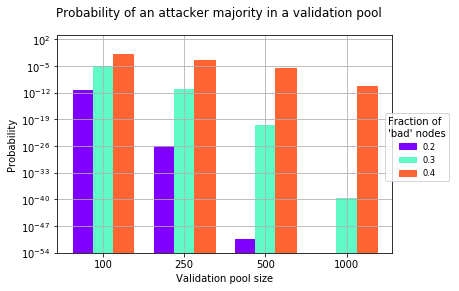

In [11]:
plot_probs_single(Nm = [100,250,500,1000],fm =[0.2,0.3,0.4])

The largest of these probabilities represents an attacker gaining control of a subset containing 100 nodes, in the situation that he has 40 percent of the total network nodes. He has roughly a 17 in 100 chance of success. For the subset of size 1000, an attacker with 40 percent of the total nodes in the network would have roughly 7 in 10 billion chance of success. 

# Time 

Though the probabilities shown above are very small it is important to be aware that when looking at the outcome over many random draws, that the probability of a successful attack occurring is higher. To illustrate the concept we can look at the example of a dice throw, where throwing a six corresponds to a successful attack. The probability of getting 6 in a fair dice throw is $1/6$, around a 17 percent chance. However in 10 successive dice rolls there is an 84 percent chance that a six will be thrown at least once. We must therefore look at the probability of having at least one successful attack over a period of time. Below we assume that a new validation set is chosen every minute.


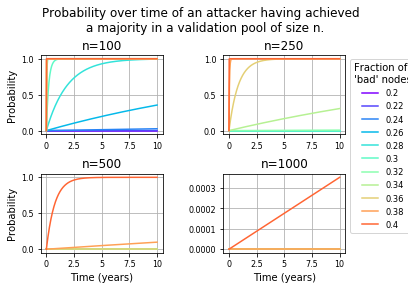

In [12]:
plot_probs_array(Nm = [100,250,500,1000],fm = [0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4],t = 10, tn = 512,filename="AttackProbs10year")

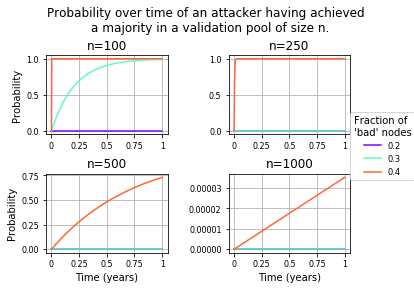

In [13]:
plot_probs_array(Nm = [100,250,500,1000],fm = [0.2,0.3,0.4], t = 1, tn = 512 ,filename="AttackProbs1year")

In [14]:
one_month = 60*24*365/12
six_months = 6*60*24*365/12
one_year = 60*24*365
ten_years = 10*60*24*365
dividing_factor = 1
time_array = np.divide([one_month, six_months, one_year, ten_years],dividing_factor)
n100 = get_probs_tminutes(100, fm = [0.2,0.3,0.4], t = time_array)
n250 = get_probs_tminutes(250, fm = [0.2,0.3,0.4], t= time_array)
n500 = get_probs_tminutes(500, fm = [0.2,0.3,0.4],t= time_array)
n1000 = get_probs_tminutes(1000, fm = [0.2,0.3,0.4],t= time_array) 
n2000 = get_probs_tminutes(2000, fm = [0.2,0.3,0.4,0.408],t= time_array) 
print(n100)
print(n250)
print(n500)
print(n1000)
print(n2000)

[[2.26877691e-07 1.36126537e-06 2.72252889e-06 2.72249554e-05]
 [3.26805538e-01 9.06922822e-01 9.91336639e-01 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.48924688e-07 3.29354361e-06 6.58707637e-06 6.58688112e-05]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]]
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.10362576 0.48127616 0.73092558 0.99999801]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.93502191e-06 1.76100023e-05 3.52196944e-05 3.52141130e-04]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


<table>
<tr>
    <th>Validation pool size</th>
    <th colspan = "9" style="text-align:center">Percentage</th> 
</tr>
<tr>
    <th></th>
    <th colspan = "3" style="text-align:center">20%</th>
    <th colspan = "3" style="text-align:center">30% </th>
    <th colspan = "3" style="text-align:center">40% </th>
</tr>
<tr>
    <th></th>
    <th colspan = "1" style="text-align:center">1 month</th>
    <th colspan = "1" style="text-align:center">6 months</th>
    <th colspan = "1" style="text-align:center">1 year </th>
    <th colspan = "1" style="text-align:center">1 month</th>
    <th colspan = "1" style="text-align:center">6 months</th>
    <th colspan = "1" style="text-align:center">1 year </th>
    <th colspan = "1" style="text-align:center">1 month</th>
    <th colspan = "1" style="text-align:center">6 months</th>
    <th colspan = "1" style="text-align:center">1 year </th>
</tr>
<tr>
    <th style="text-align:left">100</th>
    <th colspan = "1" style="text-align:center">{{n100[1,1]}}</th>
    <th colspan = "1" style="text-align:center">n100[1,2]</th>
    <th colspan = "1" style="text-align:center">n100[1,3] </th>
    <th colspan = "1" style="text-align:center">n100[2,1]</th>
    <th colspan = "1" style="text-align:center">n100[2,2]</th>
    <th colspan = "1" style="text-align:center">n100[2,3] </th>
    <th colspan = "1" style="text-align:center">n100[3,1]</th>
    <th colspan = "1" style="text-align:center">n100[3,2]</th>
    <th colspan = "1" style="text-align:center">n100[3,3] </th>
</tr>


</table>


# Further thoughts

We have seen here how significant the size of the subset is in protecting a network. Another important variable to consider is the frequency at which the validation pools are redrawn. Lowering this frequency will reduce the probability (over a given time period) of drawing a validation pool in which a single attacker has a majority. However slower cycling of validation pools may give non-aligned nodes a chance to organise a combined attack. 
